In [283]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                                                      
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [284]:
df_matches=pd.read_csv(r"C:\Users\Chandan\Desktop\matches.csv")
df_delivery=pd.read_csv(r"C:\Users\Chandan\Desktop\deliveries.csv")

In [285]:
df_matches.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


In [286]:
df_delivery.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [287]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [288]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [291]:
#merging the 2 datasets
merge_df=pd.merge(df_delivery,df_matches,left_on='id',right_on='id')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   inning            193468 non-null  int64  
 2   over              193468 non-null  int64  
 3   ball              193468 non-null  int64  
 4   batsman           193468 non-null  object 
 5   non_striker       193468 non-null  object 
 6   bowler            193468 non-null  object 
 7   batsman_runs      193468 non-null  int64  
 8   extra_runs        193468 non-null  int64  
 9   total_runs        193468 non-null  int64  
 10  non_boundary      193468 non-null  int64  
 11  is_wicket         193468 non-null  int64  
 12  dismissal_kind    9495 non-null    object 
 13  player_dismissed  9495 non-null    object 
 14  fielder           6784 non-null    object 
 15  extras_type       10233 non-null   object 
 16  batting_team      19

In [292]:
df_matches.id.is_unique

True

In [293]:
#since id is unique we can set this as our index
df_matches.set_index('id',inplace=True)

In [294]:
#summary statistics of matches data
df_matches.describe(include='all')

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
count,803,816,812,816,816.000000,816,816,816,816,812,812,799.000000,812,19,816,816
unique,32,596,233,36,NaN,15,15,15,2,15,3,NaN,2,1,48,47
top,Mumbai,2011-04-09,AB de Villiers,Eden Gardens,NaN,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN,N,D/L,HDPK Dharmasena,S Ravi
freq,101,2,23,77,NaN,108,106,106,496,120,435,NaN,799,19,78,84
mean,NaN,NaN,NaN,NaN,0.094363,NaN,NaN,NaN,NaN,NaN,NaN,17.321652,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.292512,NaN,NaN,NaN,NaN,NaN,NaN,22.068427,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.500000,NaN,NaN,NaN,NaN


In [295]:
#data pre-processing

In [296]:
df_matches.isnull().sum()

city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [297]:
#Filling in the missing values of city column
#first let's find the venues corresponding to which the vales of city are empty
df_matches[df_matches.city.isnull()][['city','venue']]

,city,venue
id,,
729281,NaN,Sharjah Cricket Stadium
729287,NaN,Dubai International Cricket Stadium
729289,NaN,Dubai International Cricket Stadium
729291,NaN,Sharjah Cricket Stadium
729295,NaN,Sharjah Cricket Stadium
729297,NaN,Dubai International Cricket Stadium
729299,NaN,Sharjah Cricket Stadium
729301,NaN,Dubai International Cricket Stadium
729303,NaN,Dubai International Cricket Stadium


In [298]:
#City values are empty for venue = Dubai International Cricket Stadium and venue=sharjah cricket stadium.both are in dubai 
#So, missing values can be filled with Dubai
df_matches.city = df_matches.city.fillna('Dubai')

In [299]:
#Player of match has 4 missing values. 
#Let's see this based on result column to find why it is empty

df_matches[df_matches.player_of_match.isnull()][['player_of_match','result']]

,player_of_match,result
id,,
501265,NaN,NaN
829763,NaN,NaN
829813,NaN,NaN
1178424,NaN,NaN


This shows when there was no result(may be match was abandoned) then there was no player_of_match which makes sense

In [300]:
#method column has close to 92% missing values. hence dropping that column

df_matches = df_matches.drop('method', axis = 1)

In [301]:
#team 1 and team2 have 14 distinct values while winner has 15 distinct values. 
#Let's check the values of the winner column

df_matches.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [302]:
#team1, team2 and winner all 3 columns have rising pune supergiant as well as rising pune supergiants. so we can just keep one of the names
df_matches['winner'] = df_matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_matches['team1'] = df_matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_matches['team2'] = df_matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [303]:
df_matches.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [304]:
print(df_matches.team1.nunique())
print(df_matches.team2.nunique())
print(df_matches.winner.nunique())

14
14
14


now team1, team2 and winner columns all have 14 distinct values

In [305]:
print(df_matches.city.unique())
print(df_matches.venue.unique())


['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Dubai' 'Rajkot' 'Kanpur' 'Bengaluru' 'Sharjah']
['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-

Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them.                              
Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium there

In [306]:
df_matches['city'] = df_matches['city'].replace('Bangalore','Bengaluru')
df_matches['city'] = df_matches['city'].replace('Chandigarh','Mohali')
df_matches.venue = df_matches.venue.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium, Mohali')

In [307]:
print(df_matches.city.nunique())
print(df_matches.venue.nunique())

31
35


In [308]:
#data preprocessing on delivery dataset

In [309]:
#In matches dataset, Rising Pune Supergiants had duplicate entries. Let's check if the same exists here as well
#We will check the batting_team and bowling_team values
print(df_delivery.batting_team.unique())
print(df_delivery.bowling_team.unique())

['Kolkata Knight Riders' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Delhi Daredevils'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']
['Royal Challengers Bangalore' 'Kolkata Knight Riders'
 'Chennai Super Kings' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' nan 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals']


In [310]:
#The same problem exists. Making it Rising Pune Supergiants
df_delivery['batting_team'] =df_delivery['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_delivery['bowling_team'] =df_delivery['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [311]:
#merging the 2 datasets again
merge_df=pd.merge(df_delivery,df_matches,left_on='id',right_on='id')

merge_df['date']=pd.to_datetime(merge_df['date'],format='%Y-%m-%d')
merge_df['season']=pd.DatetimeIndex(merge_df['date']).year
merge_df.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008


# EXPLORATORY DATA ANALYSIS

# 1.Univariate Analysis on Matches Data

### 1.1 Venue which has hosted most number of IPL matches?

In [312]:
df_matches.venue.value_counts().sort_values(ascending = False)

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                                   15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

Text(0.5, 0, 'Frequency')

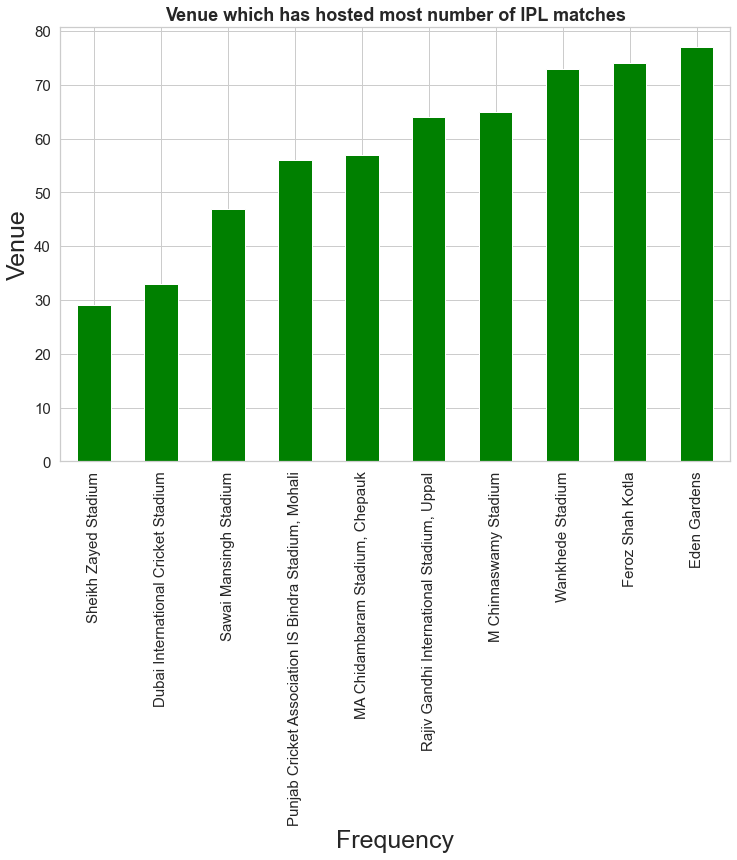

In [313]:
df_matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='green')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)

Eden Garden Stadium in Kolkata has hosted the highest number of matches so far in IPL followed by Feroz Shah Kotla  

### 1.2 Umpires who have appeared in most number of matches?

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

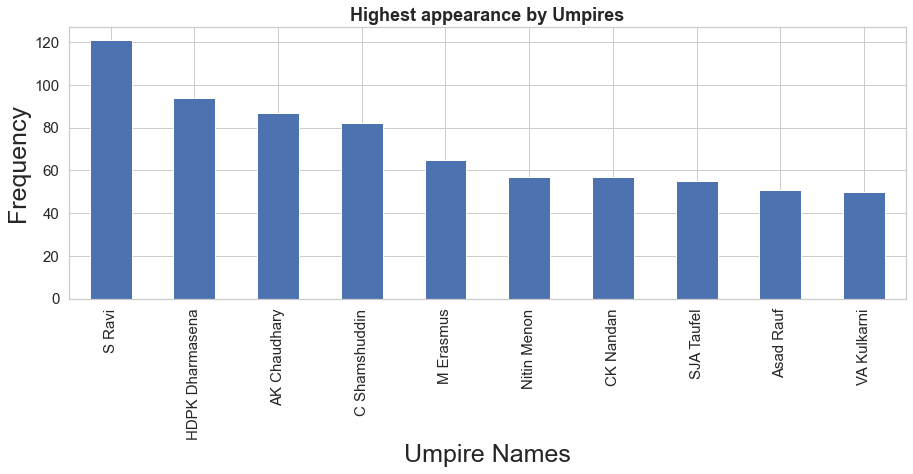

In [314]:
#A simple concatenation of 2 umpire columns will give us the total number of matches that each umpire has umpired
umpire_total = pd.concat([df_matches.umpire1,df_matches.umpire2], ignore_index=True)
umpire_total = pd.DataFrame(umpire_total, columns = ['umpire_name'])

umpire_total['umpire_name'].value_counts().head(10).plot(kind = 'bar', figsize = (15,5))
plt.title("Highest appearance by Umpires",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Umpire Names", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### 1.3 which team has highest number of wins across ipls?

In [315]:
winners=df_matches.groupby(['winner'])
winners['winner'].count().sort_values(ascending = False)

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

MUMBAI INDIANS have won the most matches across ipl till 2019

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Kolkata Knight Riders'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Daredevils'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Deccan Chargers'),
  Text(7, 0, 'Mumbai Indians'),
  Text(8, 0, 'Pune Warriors'),
  Text(9, 0, 'Kochi Tuskers Kerala'),
  Text(10, 0, 'Sunrisers Hyderabad'),
  Text(11, 0, 'Rising Pune Supergiants'),
  Text(12, 0, 'Gujarat Lions'),
  Text(13, 0, 'Delhi Capitals')])

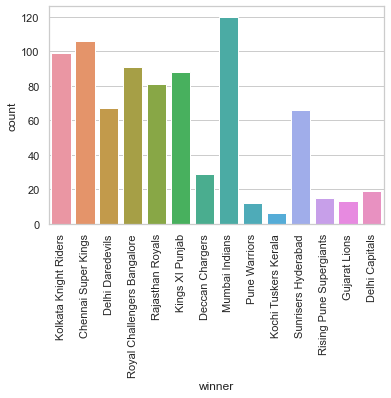

In [316]:
sns.countplot('winner',data=df_matches)
plt.xticks(rotation='vertical')

### 1.4 Top 5 players with the highest number of Man of the Match awards

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64


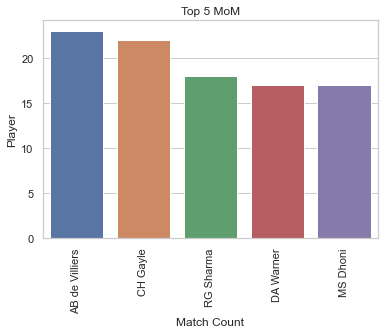

In [317]:
temp_data=df_matches['player_of_match'].value_counts().head()
print(temp_data)
sns.barplot(x=temp_data.index,y=temp_data.values,data=df_matches)
plt.title("Top 5 MoM")
plt.xticks(rotation=90)
plt.xlabel("Match Count")
plt.ylabel("Player")
plt.show()

### 1.5 The top batsman in the IPL

<AxesSubplot:xlabel='batsman'>

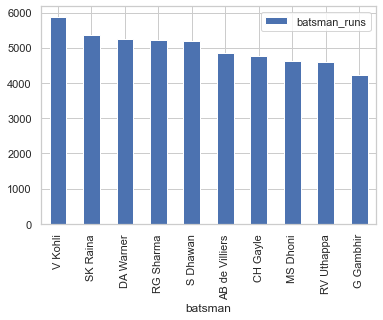

In [318]:
top_batsman=df_delivery.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(10)
top_batsman.set_index('batsman', inplace=True)
top_batsman.plot(kind='bar')

### 1.6 The bowler who has given highest number of runs

In [319]:
df_delivery.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)

,bowler,total_runs
276,PP Chawla,4330
133,Harbhajan Singh,4038
6,A Mishra,3913
99,DJ Bravo,3869
281,R Ashwin,3756
396,UT Yadav,3672
293,RA Jadeja,3515
350,SL Malinga,3486
264,P Kumar,3342
57,B Kumar,3333


### 1.6 The bowler(PP Chawla) with team-wise performance

<AxesSubplot:xlabel='batting_team'>

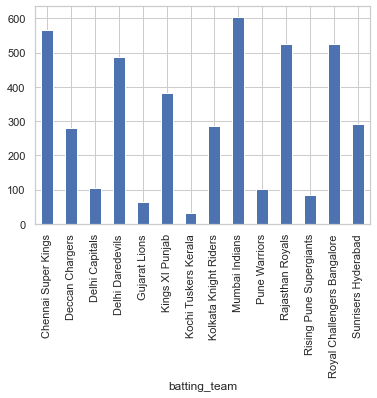

In [320]:
mask=df_delivery['bowler']=='PP Chawla'
df_delivery[mask].groupby('batting_team')['total_runs'].agg('sum').plot(kind='bar')

### 1.7 how many runs Virat Kohli scored when he faces Jasprit Bumrah.

In [321]:
mask=df_delivery['bowler']=='JJ Bumrah'
mask2=df_delivery['batsman']=='V Kohli'
df_delivery[mask].groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)['V Kohli']

79

# 1.8 most wicket by bowler

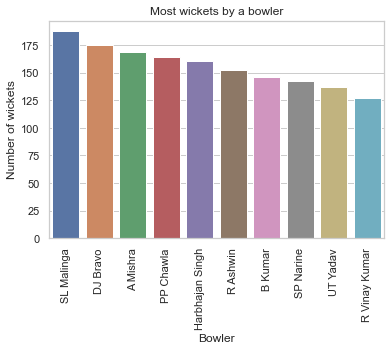

In [322]:
temp_df = df_delivery.groupby('bowler')['is_wicket'].agg('sum').reset_index().sort_values(by='is_wicket', ascending=False).reset_index(drop=True).head(10)
sns.barplot(x=temp_df['bowler'],y=temp_df['is_wicket'],data=temp_df)

plt.title("Most wickets by a bowler")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Number of wickets")
plt.show()

### 1.9 most sixes hit by players

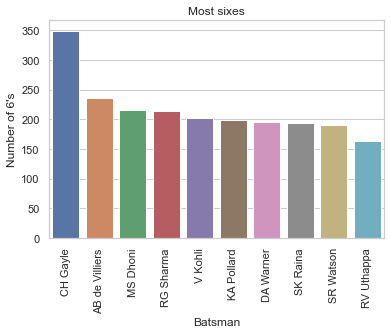

In [323]:
temp_df = df_delivery.groupby('batsman')['batsman_runs'].agg(lambda x:(x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).head(10).reset_index(drop=True)
temp_df
sns.barplot(x=temp_df['batsman'],y=temp_df['batsman_runs'],data=temp_df)

plt.title("Most sixes")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Number of 6's")
plt.show()

### 1.10 Do teams bat first or second after winning toss?

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

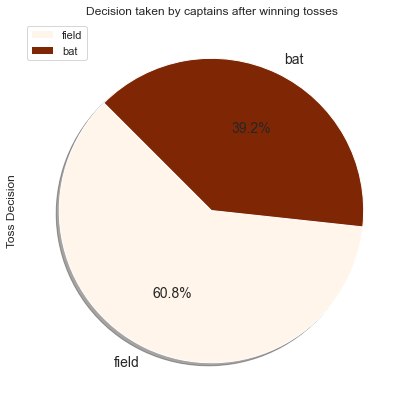

In [324]:
df_matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Oranges')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

### 1.11  Does winning toss help in winning matches?

In [325]:
df_matches['toss_win_game_win'] = np.where((df_matches.toss_winner == df_matches.winner),'Yes','No')
df_matches.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,toss_win_game_win
id,,,,,,,,,,,,,,,,
335982,Bengaluru,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,No
335983,Mohali,2008-04-19,MEK Hussey,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,Yes
335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,No
335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,No
335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,No


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

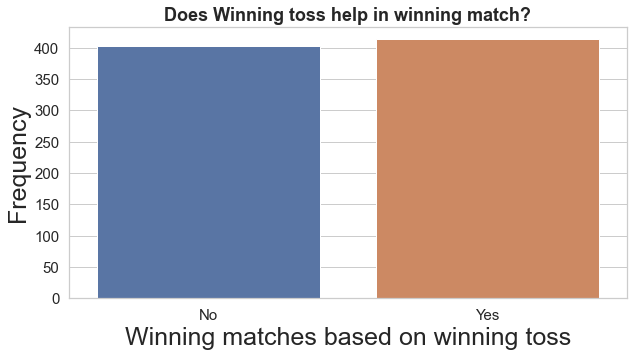

In [326]:
plt.figure(figsize=(10,5))
sns.countplot('toss_win_game_win', data=df_matches)
plt.title("Does Winning toss help in winning match?",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Winning matches based on winning toss", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

Teams winning tosses have won slightly more number of matches

### 1.12 Which player's performance has mostly led to his team's win?

Text(0.5, 0, 'Players')

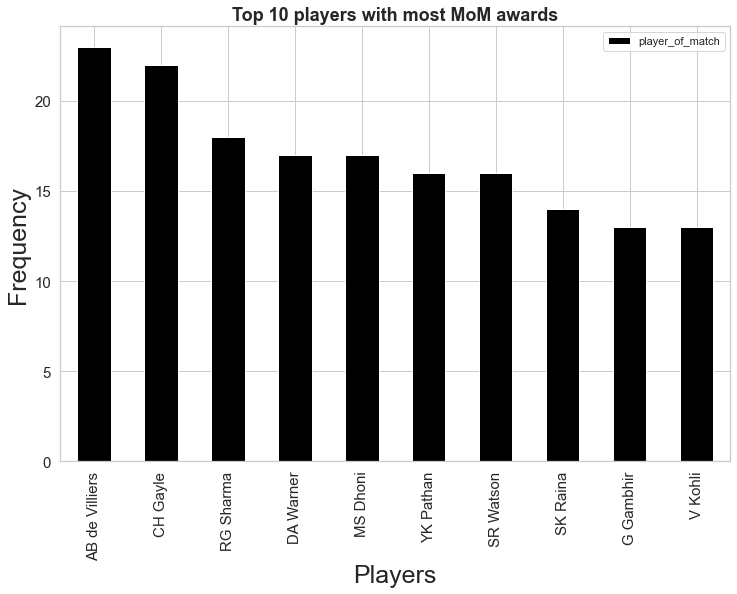

In [327]:
#MoM awards
MoM = pd.DataFrame(df_matches.player_of_match.value_counts())
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='black')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

## 2 Bivariate Analysis on Matches Data

### 2.1 Do teams bat first or second after winning toss?

Text(0, 0.5, 'Count')

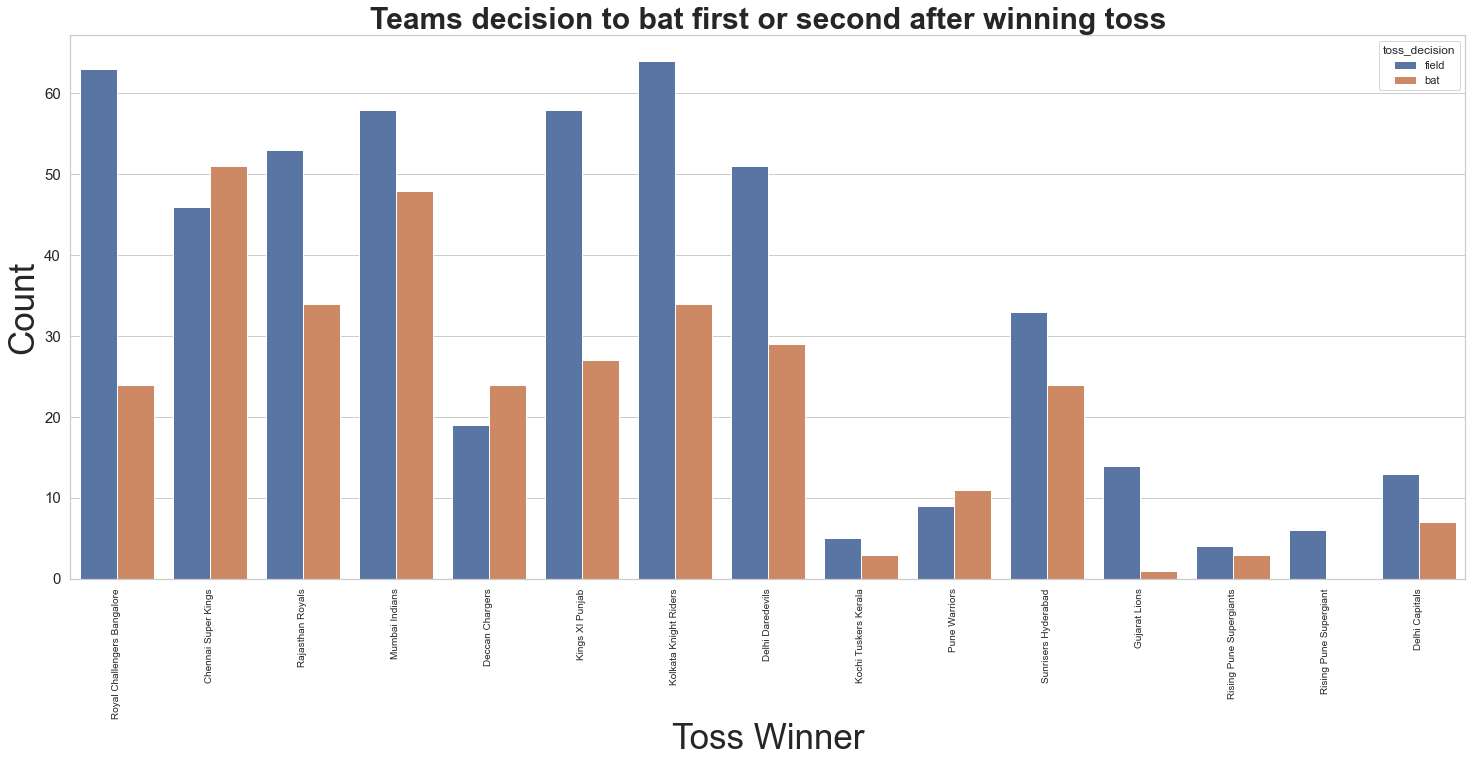

In [328]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = df_matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10,rotation=90)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

Most teams field first after winning toss except for Chennai Super Kings who has mostly opted to bat first. Deccan Chargers and Pune Warriors also show the same trend.

### 2.2 How toss decision affects match results?

Text(0, 0.5, 'Frequency')

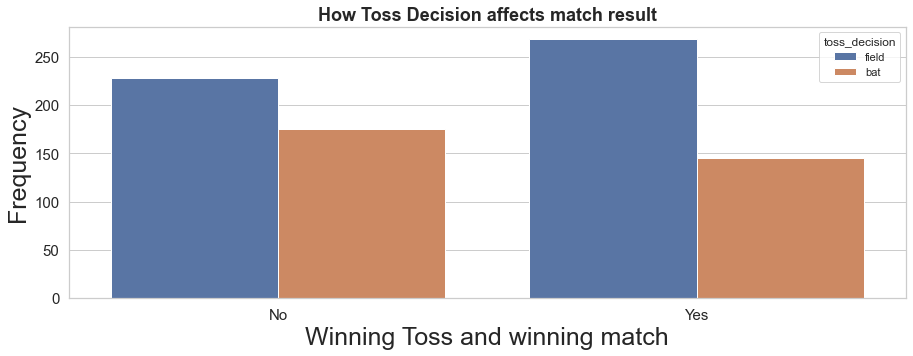

In [329]:
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=df_matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

Teams winning tosses and electng to field first have won most number of times.

### 3.Univariate Analysis based on Merged Data

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

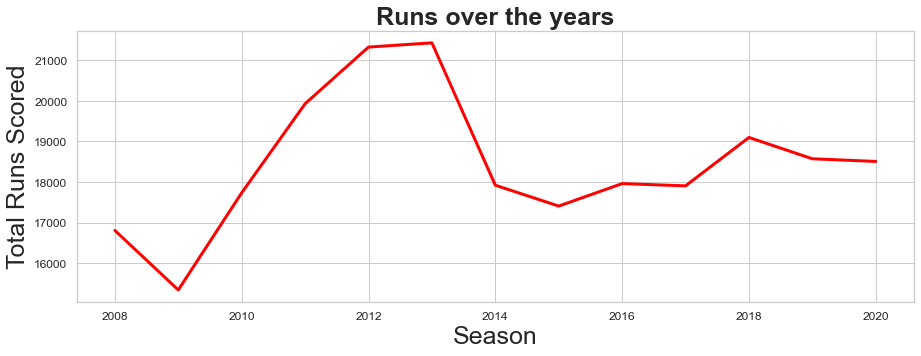

In [330]:
merge_df.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'red')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

Run scoring has gone up from the start of the IPL in 2008.

### 3.2 Are some venues more batsmen friendly than others?

In order to answer this question we can see the average runs scored in each venue which has hosted say minimum of 20 matches so far in IPL

In [331]:
venue_list = list(merge_df.venue.unique())
total_runs = {}
total_matches = {}

for i in venue_list:
    total_runs[i] = merge_df[merge_df.venue == i]['batsman_runs'].sum()
    total_matches[i] = merge_df[merge_df.venue == i].nunique()['id']
    
average_runs = pd.DataFrame({'runs':total_runs, 'matches':total_matches})
average_runs.reset_index(inplace = True)
average_runs['average'] = average_runs['runs']/average_runs['matches']

def highlight_cols(s):
    color = 'orange'
    return 'background-color: %s' % color
average_runs[average_runs['matches'] > 20].sort_values(by = 'average', ascending = False).style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['index', 'matches','average']])

,index,runs,matches,average
31,Maharashtra Cricket Association Stadium,6465,21,307.857143
1,"Punjab Cricket Association IS Bindra Stadium, Mohali",17171,56,306.625000
3,Wankhede Stadium,22158,73,303.534247
30,Dubai International Cricket Stadium,9910,33,300.303030
7,"MA Chidambaram Stadium, Chepauk",16916,57,296.771930
2,Feroz Shah Kotla,21833,74,295.040541
0,M Chinnaswamy Stadium,19113,65,294.046154
4,Eden Gardens,22443,77,291.467532
28,Sheikh Zayed Stadium,8443,29,291.137931
6,"Rajiv Gandhi International Stadium, Uppal",18584,64,290.375000


Maharashtra Cricket Association Stadium has the highest average 307.86 with 21 matches being played

### 3.3 Is there any pattern between most runs and batting order?

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

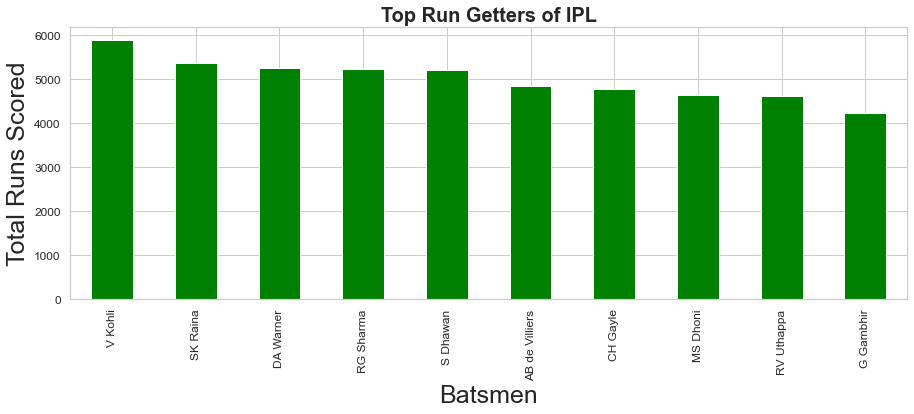

In [332]:
#let's plot the top 10 run getter so far in IPL
merge_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

Virat kohli is the highest run getter in IPL.

### 3.4 In a batsman dominated game, which bowlers have performed the best?

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

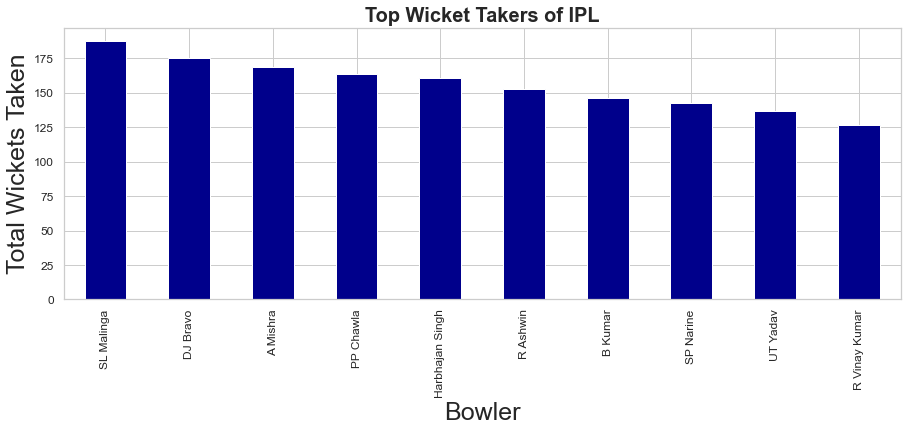

In [333]:
merge_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'darkblue', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

->Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra                                    
->In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners                                             
->All 5 spinners are right arm spinners and 2 are leg spinners while 3 are off spinners                                         
->All 5 pacers are right arm pacers

## 4 Bivariate Analysis based on Merged Data

### 4.1 Runs scored by all the teams across seasons

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

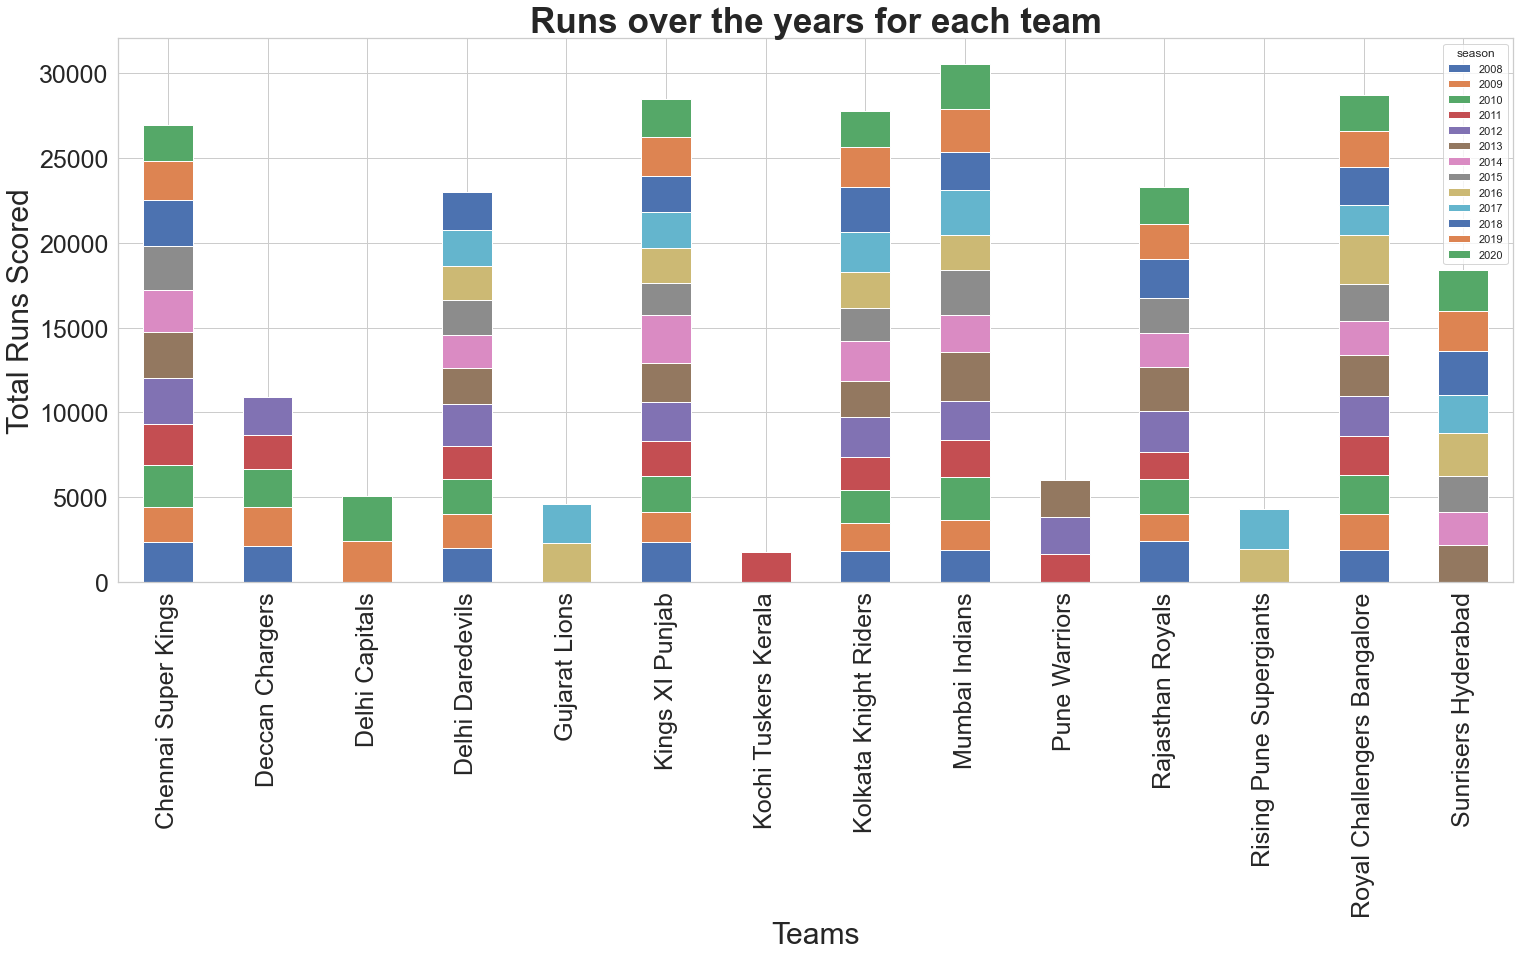

In [334]:
merge_df.groupby(['batting_team','season'])['batsman_runs'].sum().unstack().plot(kind = 'bar',stacked = True ,
                                                                                figsize = (25,10))
plt.title("Runs over the years for each team",fontsize= 35, fontweight = 'bold')
plt.xlabel("Teams", size = 30)
plt.ylabel("Total Runs Scored", size = 30)
plt.xticks(size = 25)
plt.yticks(size = 25)

### 4.2 Which batsman has been most consistent among top 10 run getters?

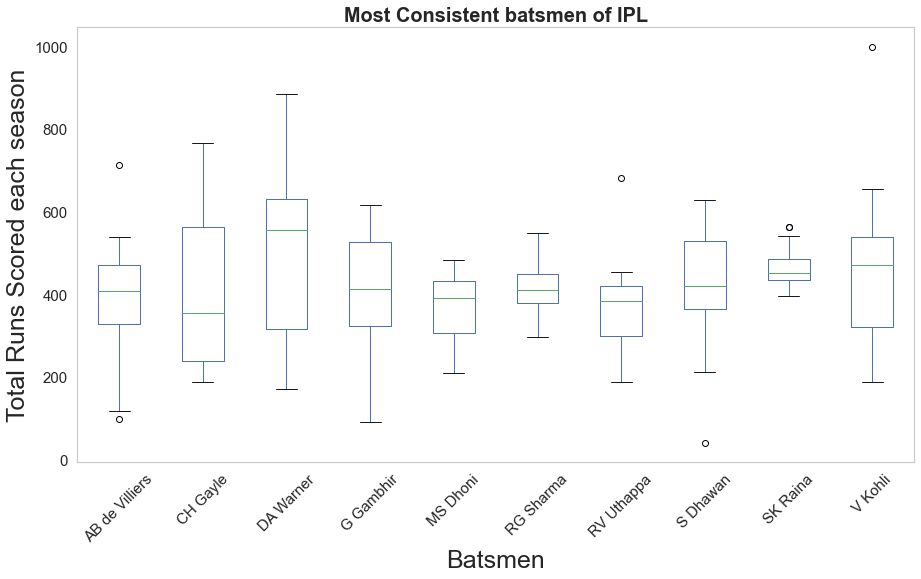

In [335]:
consistent_batsman = merge_df[merge_df.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored each season", size = 25)
plt.xticks(size = 15,rotation=45)
plt.yticks(size = 15)
plt.grid()

Median score for DA WARNER is above all the top 10 run getters. He has the highest lowest run among all the batsmen across 13 seasons. Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all.

### 4.3 Batsmen who have maintained a healthy average over the years?

In [336]:
#Players with highest batting average in IPL who have played 10 or 11 seasons?
no_of_matches = pd.DataFrame(merge_df.groupby('batsman')['id'].nunique()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_df.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_df.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_df = pd.DataFrame({'match':no_of_matches['id'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_df.reset_index(inplace = True)

batsman_df['batting_average'] = batsman_df['run']/batsman_df['match']
highest_avg = batsman_df[batsman_df['season'].isin([10,11])][['season','batsman','batting_average']].sort_values(by = 'batting_average',
                                                                                        ascending = False).head(10)

highest_avg

,season,batsman,batting_average
116,11,DA Warner,37.000000
154,11,G Gambhir,27.927152
77,11,BB McCullum,26.422018
270,11,M Vijay,24.942857
55,11,AT Rayudu,24.557047
37,10,AJ Finch,23.588235
535,11,Yuvraj Singh,21.825397
220,11,KA Pollard,20.993056
291,10,MK Tiwary,20.421687
273,10,MA Agarwal,20.361446


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

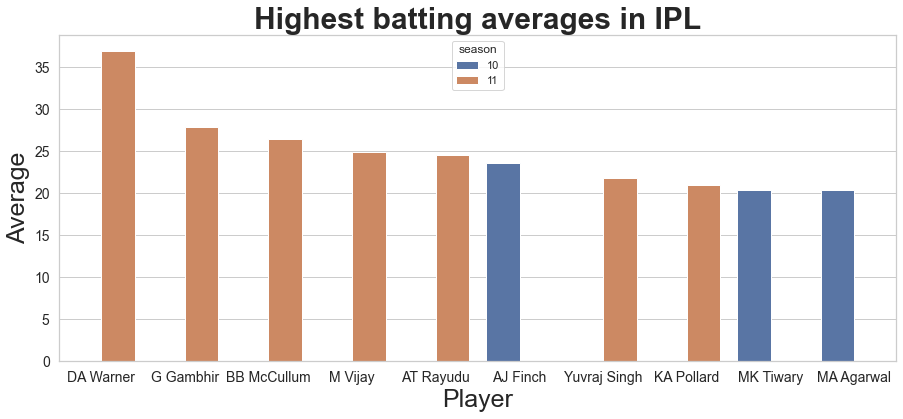

In [337]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='batting_average', data = highest_avg, hue = 'season')
plt.title("Highest batting averages in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Average", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

Warner has the highest average followed by gambir and mccullum

#### 4.4 Batsmen with the best strike rates over the years

In [338]:
no_of_balls = pd.DataFrame(merge_df.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_df.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_df.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
220,11,KA Pollard,143.474134
116,11,DA Warner,137.575281
273,10,MA Agarwal,129.007634
77,11,BB McCullum,127.040141
462,10,STR Binny,125.714286
535,11,Yuvraj Singh,124.716553
37,10,AJ Finch,123.612824
55,11,AT Rayudu,123.198653
305,10,Mandeep Singh,121.627566
233,10,KM Jadhav,120.485744


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

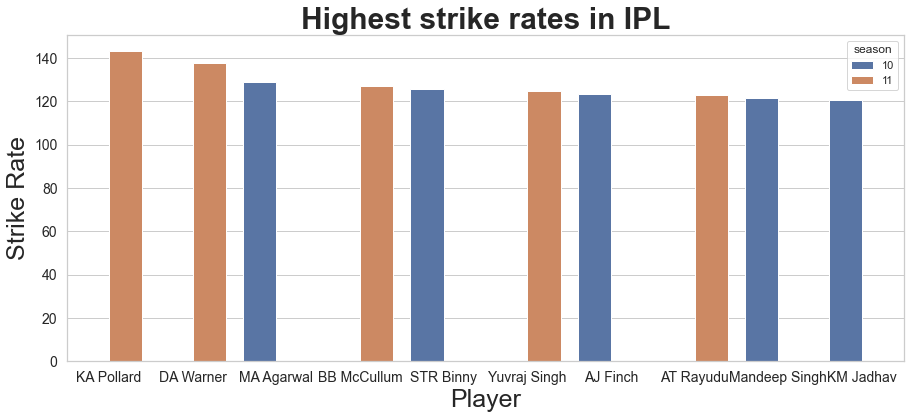

In [339]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

### 4.5 Which bowlers have performed well over last few seasons and can be considered further for upcoming auctions?

In [340]:
runs_given = pd.DataFrame(merge_df.groupby('bowler')['batsman_runs'].sum())
wickets_taken = pd.DataFrame(merge_df[merge_df['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge_df.groupby('bowler')['season'].nunique())
bowler_avg = pd.DataFrame({'runs':runs_given['batsman_runs'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_avg.reset_index(inplace = True)

bowler_avg['wickets'].dropna(axis = 0, inplace = True)

In [341]:
bowler_avg['bowling_average'] = bowler_avg['runs']/bowler_avg['wickets']
best_bowling_avg = bowler_avg[bowler_avg['wickets'] > 50].sort_values(by = 'bowling_average', ascending = True).head(10)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

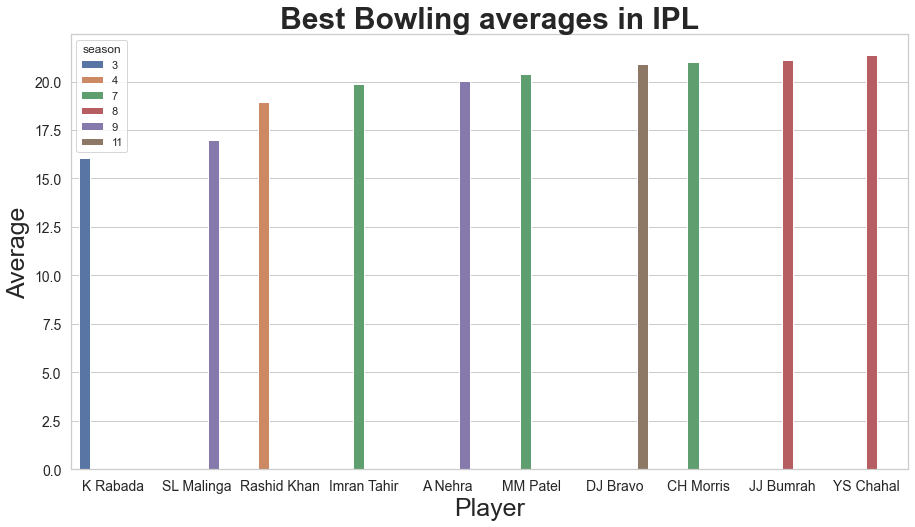

In [342]:
plt.figure(figsize = (15,8))
sns.barplot(x='bowler', y='bowling_average', data = best_bowling_avg, hue = 'season')
plt.title("Best Bowling averages in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Average", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

### 4.6 Which bowlers have picked up wickets more frequently?

In [343]:
#strike_rate = balls bowled by wickets taken
balls_bowled = pd.DataFrame(merge_df.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(merge_df[merge_df['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge_df.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'green'
    return 'background-color: %s' % color
#Strike rate for bowlers who have taken more than 50 wickets
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
176,K Rabada,840,66,3,12.727273
350,SL Malinga,2974,188,9,15.819149
143,Imran Tahir,1314,83,7,15.831325
99,DJ Bravo,2846,175,11,16.262857
8,A Nehra,1974,121,9,16.314050


### 4.7 Which bowlers have maintained best economy rates over the years?

In [344]:
runs_given = pd.DataFrame(merge_df.groupby('bowler')['batsman_runs'].sum())
balls_bowled = pd.DataFrame(merge_df.groupby('bowler')['ball'].count())
overs_bowled = balls_bowled['ball']/6
wickets_taken = pd.DataFrame(merge_df[merge_df['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge_df.groupby('bowler')['season'].nunique())
bowler_economy_rate = pd.DataFrame({'runs':runs_given['batsman_runs'],'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season'],'overs':overs_bowled})
bowler_economy_rate.reset_index(inplace = True)

#Best economy rates for bowlers who have played at least 5 seasons
bowler_economy_rate['economy_rate'] = bowler_economy_rate['runs']/bowler_economy_rate['overs']
best_economy_rate = bowler_economy_rate[bowler_economy_rate.season >= 5].sort_values(by = 'economy_rate', ascending = True)

best_economy_rate.head().style.apply(lambda x: ['background: lightgreen' if x.name in [106,315,253] 
                              else '' for i in x], 
                   axis=1)

,bowler,runs,balls,wickets,season,overs,economy_rate
216,M Muralitharan,1632,1577,66,7,262.833333,6.209258
117,DW Steyn,2391,2276,105,11,379.333333,6.303163
302,RN ten Doeschate,88,83,3,5,13.833333,6.361446
149,J Yadav,285,268,6,5,44.666667,6.380597
297,RE van der Merwe,486,455,25,5,75.833333,6.408791


RE Van der Merwe has best economy rate

## Over wise batting performance of each team in IPL(2008–2020)

<AxesSubplot:xlabel='over', ylabel='batting_team'>

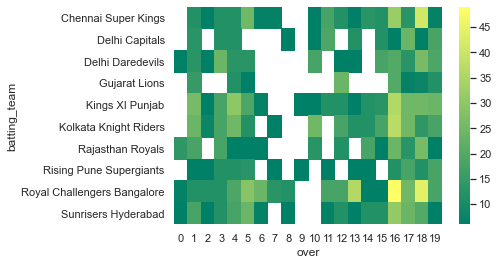

In [345]:
d=df_delivery[mask]
d=d[['batting_team','over','batsman_runs']]
x=d.pivot_table(values='batsman_runs', index='batting_team', columns='over', aggfunc='count')
sns.heatmap(x, cmap='summer')